## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
# 1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>
import numpy as np
# 2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>
import matplotlib.pyplot as plt
# 3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>
import warnings
warnings.filterwarnings('ignore')

## 모델 학습에 사용할 데이터셋을 불러옵니다.

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH_train = '../0.Data/tox21_train.csv'
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.
df_train = pd.read_csv(Data_PATH_train)
# pandas 라이브러리의 read_csv 메소드를 활용하여 csv 파일을 load합니다.
df_train

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1]

# Train 과정에 사용할 데이터와 Test 과정에 사용할 데이터를 load한 이후, 
# 해당 데이터 중에서 독립변수와 반응변수를 별도로 저장해줍니다.

# df_train은 X_train(독립변수), y_train(반응변수)로 분할합니다.
# maccs_1열[column = 0]부터 maccs_166열[column = 165]까지는 독립변수이고, 마지막 열(NR-AR)은 반응변수(정답값)입니다.

print(X_train.shape, y_train.shape)

(11130, 166) (11130,)


## 모델을 생성합니다.

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

model = QDA(reg_param = 0.001, tol=0.0001)
model.fit(X_train, y_train)

# 학습에 사용할 모델은 Quadratic Discriminant Analysis(LDA) 입니다.
# - Quadratic Discriminant Analysis (QDA)는 지도 학습 분류 기법으로, 데이터가 두 개 이상의 클래스로 분류될 때 각 클래스의 데이터 분포가 정규분포라고 가정하고,
# - 이 분포를 기반으로 새로운 데이터 포인트가 어느 클래스에 속할지 결정합니다. QDA는 각 클래스마다 고유한 공분산 행렬을 가지고 있어, 비선형 분류 경계를 형성할 수 있고 복잡한 데이터 구조에서 유용하게 사용됩니다.

QuadraticDiscriminantAnalysis(reg_param=0.001)

## Quadratic Discriminant Analysis (QDA)의 주요 하이퍼파라미터

- `priors`: 각 클래스의 사전 확률입니다. 배열의 형태로 제공되며, None일 경우 클래스 비율에 따라 자동으로 결정됩니다.
- `reg_param`: 정규화 매개변수로, 클래스별 공분산의 역수에 적용됩니다. 이 매개변수는 모델의 복잡도를 조절하여 과적합을 방지할 수 있습니다. 값이 클수록 더 강한 정규화가 적용됩니다.
- `store_covariance`: boolean(T/F) 값으로, True일 경우 각 클래스에 대한 공분산 행렬이 계산되어 `covariance_` 속성에 저장됩니다. 이는 모델의 예측 성능에 영향을 주지 않지만, 분석 목적으로 유용할 수 있습니다.
- `tol`: 수치적 안정성을 위한 임계값입니다. 이 매개변수는 모델이 공분산 행렬의 역행렬을 계산할 때 사용되는 정밀도를 결정합니다.

### 사용 시 고려 사항

- QDA는 공분산 행렬이 클래스마다 다르기 때문에, 클래스 내 데이터의 분포가 상당히 다를 때 효과적입니다.
- 데이터의 차원이 높고 샘플 수가 적은 경우, 과적합의 위험이 있으므로 적절한 `reg_param` 값의 선택이 중요합니다.

### 참고 자료

- 공식 문서 링크: (https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)



## Quadratic Discriminant Analysis (QDA)의 목적함수

Quadratic Discriminant Analysis (QDA)는 분류 문제에서 사용되는 기법으로, 각 클래스의 데이터가 가우시안 분포를 따른다고 가정합니다. QDA의 목적 함수는 주어진 데이터를 가장 잘 분류하는 클래스의 확률 분포 파라미터를 찾는 것입니다. 

QDA는 각 클래스 $k$에 대해 다음과 같은 이차판별함수(quadratic discriminant function)를 사용합니다:

$$
\delta_k(x) = -\frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log \pi_k
$$

여기서:

- $x$는 입력 특성 벡터입니다.
- $\mu_k$는 클래스 $k$의 평균 벡터입니다.
- $\Sigma_k$는 클래스 $k$의 공분산 행렬입니다.
- $|\Sigma_k|$는 $\Sigma_k$의 행렬식입니다.
- $\Sigma_k^{-1}$는 $\Sigma_k$의 역행렬입니다.
- $\pi_k$는 클래스 $k$의 사전 확률입니다.

QDA 관련 문서: [https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)

## Quadratic Discriminant Analysis Model의 Feature Importance 시각화

Feature maccs_34: Importance = 0.008086253369272267
Feature maccs_74: Importance = 0.008086253369272267
Feature maccs_128: Importance = 0.0060197663971249815
Feature maccs_129: Importance = 0.005570530098832127
Feature maccs_99: Importance = 0.005031446540880613
Feature maccs_156: Importance = 0.005031446540880613
Feature maccs_26: Importance = 0.004941599281221953
Feature maccs_108: Importance = 0.004941599281221953
Feature maccs_142: Importance = 0.004761904761904856
Feature maccs_93: Importance = 0.004672057502246307


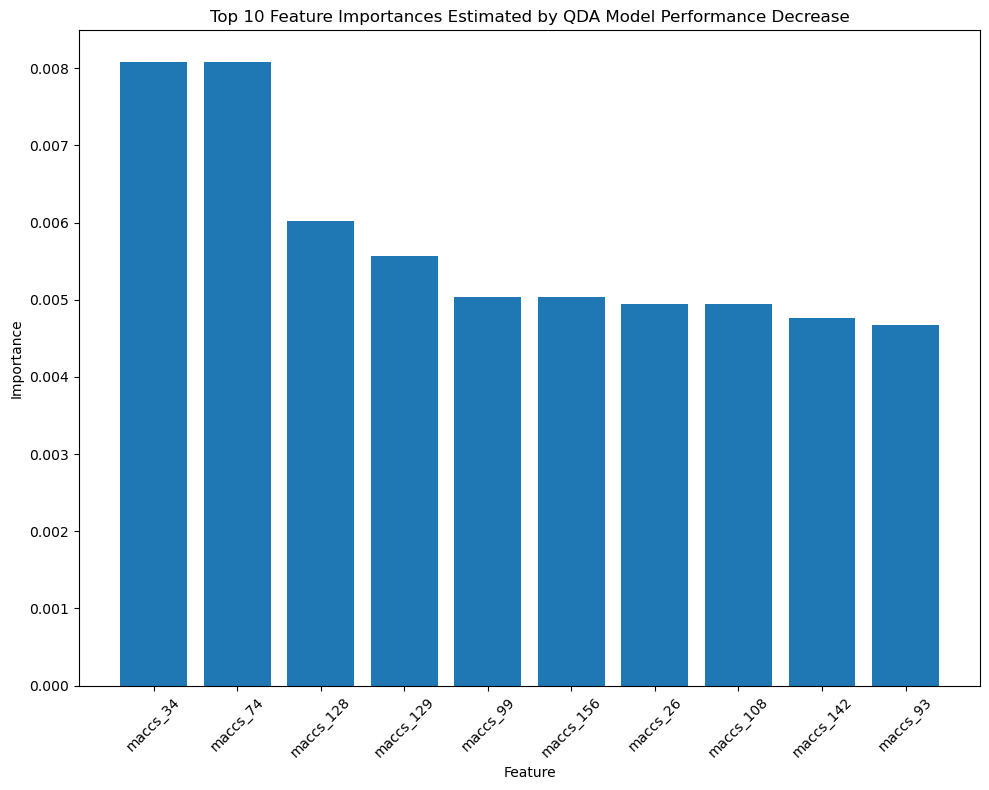

In [5]:
from sklearn.model_selection import cross_val_score

# 원본 모델 성능 계산
baseline_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))

feature_importances = []
for i in range(X_train.shape[1]):
    X_new = X_train.drop(columns=[f'maccs_{i+1}'])  # i번째 특성 제거
    score = np.mean(cross_val_score(model, X_new, y_train, cv=5))
    feature_importances.append(baseline_score - score)  # 성능 감소 = 중요도

# 점수 조정
min_feature_importance = abs(min(feature_importances))
feature_importances =  list(map(lambda x: x + min_feature_importance, feature_importances))

# 상위 10개 특성 중요도와 해당 인덱스 추출
top_10_indices_and_importances = sorted(enumerate(feature_importances), key=lambda x: x[1], reverse=True)[:10]

# 인덱스와 중요도 분리
top_indices, top_importances = zip(*top_10_indices_and_importances)

# 원래 인덱스와 함께 출력
for index, importance in zip(top_indices, top_importances):
    print(f"Feature maccs_{index+1}: Importance = {importance}")

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.bar(range(10), top_importances, align='center', tick_label=[f"maccs_{index+1}" for index in top_indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances Estimated by QDA Model Performance Decrease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# - QDA 모델을 사용하여 특성 중요도를 평가하고, Feature Importance가 가장 높은 상위 10개 Feature을 식별하여 시각화하는 코드입니다.
# - QDA는 Feature Importance 계산 함수를 제공하지 않기에, 한 특성씩 제거하여 165개의 항목을 가지고 validation을 진행하여 166개의 특성을 가지고
# - validation을 진행한 결과와 비교하는 방식으로 Importance를 계산합니다.

## 결정 경계 시각화

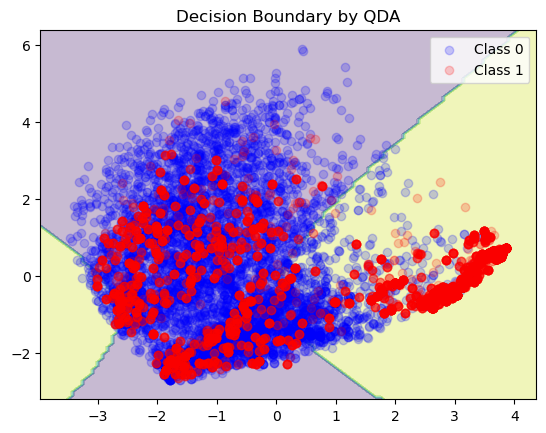

Confusion Matrix in X_pca Dataset


array([[4666,  899],
       [2545, 3020]], dtype=int64)

In [6]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# QDA 모델 학습
model_pca = QDA(reg_param = 0.001, tol=0.0001)
model_pca.fit(X_pca, y_train)

# 결정 경계 시각화를 위한 그리드 생성 
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열

# QDA 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y_train==0], X_pca[:, 1][y_train==0], color='blue', alpha=0.2, label='Class 0')
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y_train==1], X_pca[:, 1][y_train==1], color='red', alpha=0.2, label='Class 1')
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.title("Decision Boundary by QDA")
plt.legend()
plt.show()

# 아래 그림은 두 Feature를 사용하여 QDA를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 표현할 수 있기에 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.
print("Confusion Matrix in X_pca Dataset")
confusion_matrix(y_train, model_pca.predict(X_pca))
# 혼동 행렬을 출력합니다.

## 혼동 행렬을 출력합니다.

In [7]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix

Data_PATH_test = '../0.Data/tox21_test.csv'
df_test = pd.read_csv(Data_PATH_test)
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1]
# df_test는 X_test(독립변수), y_test(반응변수)로 분할합니다.

print("Confusion Matrix in Test Dataset")
confusion_matrix(y_test, model.predict(X_test))

# 혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
# - 1022개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
# - 369개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
# - 31개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
# - 31개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)


Confusion Matrix in Test Dataset


array([[1022,  369],
       [  31,   31]], dtype=int64)